# Prediction of Price Categories using Classification  <img src="https://i.imgur.com/9y2NKWY.png" align="right" width=80/>

This task focuses on:



*   End-to-end machine learning on a classification problem
*   Training multiclass classification models
*   Making sense of confusion matrices and metrics to assess model performances





Reminder: End-to-end Machien Learning steps are to 



1.   Download the data
2.   Understand and Clean the Data
3.   Preprocess and Feature Engineer the Data
4.   Train a model using the data
5.   Measure the model's performance using cross validation
6.   Do hyperparameter tuning on the model and/or try different models
7.   Use the final selected model to make predictions on the test set



In this task, we won't be using pipelines!

This is for a few reasons:



*   There are often a few different ways to accomplish something in data science
you don't need to know all of them but you also shouldn't only have one tool in 
your toolbox 
*   Pipelines hide some of the underlying complexity of preprocessing and 
building models, this is great if you understand how everything works and just
want to deploy to production, but when you're learning it's often a good idea
to tinker with the tools you're using and try to get a better understanding of
how they work. 



<h2> In this task we'll train and select a multiclass classification model to predict whether a car's price is within one of five price categories.<h2>

# First, let's load the data

In [ ]:
!gdown 1o2-1X1tRMj5lPS5NOVAfE7gkGqIXC35q
!gdown 1-aMbeDwChOmgRC2ICAM0X3Nvx8PeuyyC
!gdown 1t1HHi_LeAEW5rXkaoTMHYIo2KuJvgLRI

Downloading...
From: https://drive.google.com/uc?id=1o2-1X1tRMj5lPS5NOVAfE7gkGqIXC35q
To: /content/Cars_train.csv
100% 895k/895k [00:00<00:00, 63.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-aMbeDwChOmgRC2ICAM0X3Nvx8PeuyyC
To: /content/Cars_test.csv
100% 430k/430k [00:00<00:00, 48.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t1HHi_LeAEW5rXkaoTMHYIo2KuJvgLRI
To: /content/sample_submission.csv
100% 36.3k/36.3k [00:00<00:00, 29.2MB/s]


Note: We'll drop the id column from the test set since the sample submission file has the same order as the test_df

In [ ]:
import pandas as pd
#Helps make printing numbers look better
pd.options.display.float_format = '{:.2f}'.format

train_df = pd.read_csv("Cars_train.csv")

test_df = pd.read_csv("Cars_test.csv")
test_df = test_df.drop('id', axis=1)


# Let's have a quick look at the dataset

<h1><b>Q1: Use some pandas built-in functions like head, describe, value_counts, etc. to take an initial look at train_df</b></h1>

In [ ]:
train_df.head(10)

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,price_category
0,Chevrolet,Aveo,Sedan,Gray,2018,Benzine,100000 to 119999,1400 - 1500 CC,Automatic,207.00,Alexandria,2
1,Hyundai,Accent,Sedan,Silver,2008,Benzine,180000 to 199999,1000 - 1300 CC,Manual,95.50,Qena,0
2,Hyundai,Matrix,Hatchback,Other Color,2001,Benzine,180000 to 199999,1600 CC,Automatic,132.00,Alexandria,1
3,Fiat,Punto,Hatchback,White,2006,Benzine,140000 to 159999,1000 - 1300 CC,Manual,74.80,Cairo,0
4,Chevrolet,Cruze,Sedan,Gray,2016,Benzine,140000 to 159999,1600 CC,Automatic,195.50,Cairo,1
5,Fiat,Punto,Hatchback,Other Color,2004,Benzine,120000 to 139999,1000 - 1300 CC,Manual,75.00,Alexandria,0
6,Hyundai,Tucson,SUV,Black,2021,Benzine,10000 to 19999,1600 CC,Automatic,185.60,Giza,1
7,Hyundai,Elantra,Sedan,Burgundy,2015,Benzine,20000 to 29999,1600 CC,Automatic,258.80,Kafr al-Sheikh,2
8,Fiat,Uno,Hatchback,Red,1993,Benzine,160000 to 179999,1000 - 1300 CC,Manual,35.00,Cairo,0
9,Fiat,128,Sedan,White,1983,Benzine,More than 200000,1000 - 1300 CC,Manual,18.40,Giza,0


In [ ]:
train_df.describe()

,Year,Price,price_category
count,9876.00,9876.00,9876.00
mean,2005.51,116.67,0.73
std,12.63,82.13,0.80
min,1971.00,3.00,0.00
25%,1998.00,43.70,0.00
50%,2010.00,110.00,1.00
75%,2015.00,161.00,1.00
max,2022.00,471.50,4.00


In [ ]:
for column in train_df.columns :
   print(f"{column} : {train_df[column].unique()}")


  

Brand : ['Chevrolet' 'Hyundai' 'Fiat']
Model : ['Aveo' 'Accent' 'Matrix' 'Punto' 'Cruze' 'Tucson' 'Elantra' 'Uno' '128'
 'Shahin' 'Verna' 'Optra' 'Lanos' 'Avante' 'I10' '131' 'Tipo' 'Excel']
Body : ['Sedan' 'Hatchback' 'SUV']
Color : ['Gray' 'Silver' 'Other Color' 'White' 'Black' 'Burgundy' 'Red'
 'Blue- Navy Blue' 'Brown' 'Green' 'Gold' 'Yellow' 'Beige' 'Orange']
Year : [2018 2008 2001 2006 2016 2004 2021 2015 1993 1983 1998 2010 2007 1992
 1985 2020 2017 2011 2019 1994 2013 2000 2012 1990 2009 1977 1979 1984
 1988 1980 1996 2005 1986 1999 2002 1978 1989 1982 2003 1997 2014 1991
 1981 1995 2022 1975 1974 1987 1976 1972 1973 1971]
Fuel : ['Benzine' 'Natural Gas']
Kilometers : ['100000 to 119999' '180000 to 199999' '140000 to 159999'
 '120000 to 139999' '10000 to 19999' '20000 to 29999' '160000 to 179999'
 'More than 200000' '70000 to 79999' '0 to 9999' '60000 to 69999'
 '80000 to 89999' '50000 to 59999' '90000 to 99999' '30000 to 39999'
 '40000 to 49999']
Engine : ['1400 - 1500 CC' '10

As we see, we have price_category ranging from 0 to 4, each category meaning 0 to 100K, 100K to 200K, etc.

The Price column is not needed since we're framing this as a classification problem. 
I only left it in case you're curious how much each car actually cost 💰 (Be careful since the dataset was actually collected about 5 months ago so the majority of the prices you see in the dateset are a bit lower (okay, maybe much lower) than the current price

<h2><b>Don't forget to run the next cell to drop the Price column before training</b><h2>



In [ ]:
train_df = train_df.drop('Price', axis=1)

<h1><b>Q2: Use any visualization library you like to visualize some of the datasets attributes. Hint: One idea is to try plotting bar plots of categorical variables against the target variable like in the next cell. Other solutions are also welcome. </b></h1>

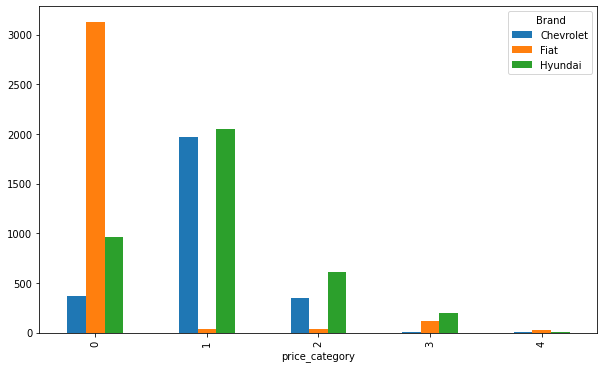

In [ ]:
train_df.groupby('price_category').Brand.value_counts().unstack().plot(kind='bar', figsize=(10,6))

Try looking for trends and trying to ask and answer questions about the dataset,
like are cars more likely to be more expensive the more recent they are?
The next cell tries to answer that question.

But always be careful not to jump into conclusions too early!

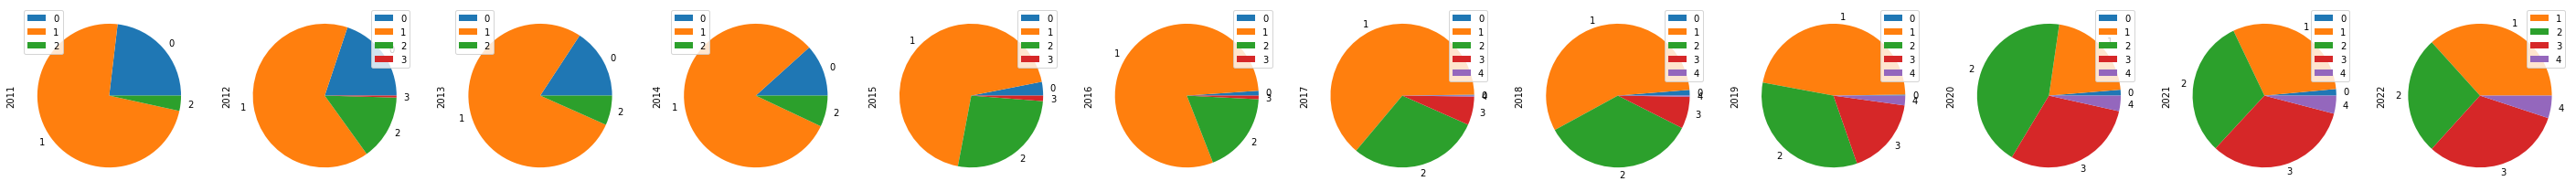

In [ ]:
train_df[train_df.Year > 2010].groupby('price_category').Year.value_counts().unstack().plot(kind='pie', figsize=(50,50), subplots=True);

# Prepare the Data for Machine Learning Algorithms

<h1><b>Q3.1: Show the dtypes of each column in the dataset.</b></h1>

In [ ]:
train_df.dtypes

Brand             object
Model             object
Body              object
Color             object
Year               int64
Fuel              object
Kilometers        object
Engine            object
Transmission      object
Gov               object
price_category     int64
dtype: object

<h1><b>Q3.2: Use the 'select_dtypes' method in pandas to select columns which have the dtype 'object', assign that to a variable called cat_columns</b></h1>

Note: For questions requiring you to complete pieces of code, some comments will be explanatory and others will require you to write code.

Comments that are part of a question are prefixed with TODO: to make it easier to find.

In [ ]:
cat_columns = ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Kilometers', 'Engine','Transmission', 'Gov']
#We'll use num_columns as provided here since it's not worth it to select_dtypes for it
num_columns = ['Year'] 

#cat_columns = train_df.select_dtypes(include='object')


The following cell demonstrates how to:


*   Transform categorical variable to one hot encoded variables
*   Create a pandas dataframe from the transformed array


But what if we want to join the created dataframe (which only contains the one hot representation of categorical variables) to the original dataframe?

The next two questions illustrate this.

First: Run the next cell







In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(train_df[cat_columns])

train_cat_one_hot = enc.transform(train_df[cat_columns])

train_cat_one_hot_df = pd.DataFrame(train_cat_one_hot.toarray(), 
                                    columns=enc.get_feature_names_out(),
                                    index=train_df.index)

train_cat_one_hot_df

,Brand_Chevrolet,Brand_Fiat,Brand_Hyundai,Model_128,Model_131,Model_Accent,Model_Avante,Model_Aveo,Model_Cruze,Model_Elantra,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9872,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9873,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9874,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h1><b>Q3.3: Now use the function `pd.concat` to concatenate `train_df` and`train_cat_one_hot_df`. Pay special attention to the axis argument of pd.`concat`  </b></h1>

In [ ]:
display(pd.concat([train_cat_one_hot_df, train_df], 
                  axis = 1))


,Brand_Chevrolet,Brand_Fiat,Brand_Hyundai,Model_128,Model_131,Model_Accent,Model_Avante,Model_Aveo,Model_Cruze,Model_Elantra,...,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov,price_category
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,Aveo,Sedan,Gray,2018,Benzine,100000 to 119999,1400 - 1500 CC,Automatic,Alexandria,2
1,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,Accent,Sedan,Silver,2008,Benzine,180000 to 199999,1000 - 1300 CC,Manual,Qena,0
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,Matrix,Hatchback,Other Color,2001,Benzine,180000 to 199999,1600 CC,Automatic,Alexandria,1
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,Punto,Hatchback,White,2006,Benzine,140000 to 159999,1000 - 1300 CC,Manual,Cairo,0
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,Cruze,Sedan,Gray,2016,Benzine,140000 to 159999,1600 CC,Automatic,Cairo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,Lanos,Sedan,White,2010,Natural Gas,30000 to 39999,1400 - 1500 CC,Manual,Cairo,0
9872,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,Avante,Sedan,Silver,2003,Benzine,100000 to 119999,1600 CC,Automatic,Suez,1
9873,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,Aveo,Sedan,Black,2017,Benzine,50000 to 59999,1400 - 1500 CC,Automatic,Monufia,1
9874,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,Lanos,Sedan,Red,2016,Benzine,70000 to 79999,1400 - 1500 CC,Manual,Alexandria,1


<h1><b>Q3.4: Now drop cat_columns from the train_df since they are already one hot encoded </b></h1>

In [ ]:
train_df=  train_df.drop(cat_columns, axis=1)

<h1><b>Q4: Use MinMaxScaler to transform num_columns to be in the range 0-1 </b></h1>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#TODO: fit the scaler on train[num_columns] first
transformed_df = scaler.fit_transform(train_df[num_columns])
#TODO: Then set train[num_columns] to be the transformed output
train_df[num_columns] = transformed_df




<h1><b>Q5: Put all of that into one preprocessing function! </b></h1>

The string following the function declaration is called a docstring. 

It's a clean way to include documentation inside the code
Data science usually doesn't have a lot of clean code but
it's the right way to do things.

You don't *need* to write docstrings for your functions in
any of our tasks -this isn't the software engineering committee!-
but it's just something to keep in mind for the future

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

def preprocess(train_df, test_df=None):
    """Performs preprocessing on a Pandas DataFrame. 
    Optionally applies the same preprocessing steps
    to transform a test dataframe if provided.

    
    Parameters
    ----------
    train_df: Pandas DataFrame
        The dataframe to do preprocessing on. 
    test_df:  Pandas DataFrame
        Optional. The test dataframe in case it exists.
    
    Returns
    -------

    train_df Pandas DataFrame
        The preprocessed training dataframe. 
    test_df [Pandas DataFrame or None]
        The preprocessed test dataframe. 
        If no dataframe is provided then it's None.
    """

    num_columns = ['Year'] 
    cat_columns = ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Kilometers', 'Engine','Transmission', 'Gov']

    enc = OneHotEncoder(handle_unknown='ignore')

    enc.fit(train_df[cat_columns])

    train_cat_one_hot = enc.transform(train_df[cat_columns])

    train_cat_one_hot_df = pd.DataFrame(train_cat_one_hot.toarray(), 
                                        columns=enc.get_feature_names_out(),
                                        index=train_df.index)

    train_df = pd.concat([train_cat_one_hot_df, train_df], axis = 1)
    train_df=  train_df.drop(cat_columns, axis=1)

    scaler = MinMaxScaler()
    transformed_df = scaler.fit_transform(train_df[num_columns])
    train_df[num_columns] = transformed_df

    


    #This is to ensure the same preprocessing steps we did to train_df
    #are applied to test_df
    #It's the exact same code as above but with test_df instead of train_df
    if test_df is not None:

        test_cat_one_hot = enc.transform(test_df[cat_columns])

        test_cat_one_hot_df = pd.DataFrame(test_cat_one_hot.toarray(), 
                                            columns=enc.get_feature_names_out(),
                                            index=test_df.index)

        test_df =pd.concat([test_cat_one_hot_df, test_df], axis = 1)
        test_df =test_df.drop(cat_columns, axis=1)


        test_df[num_columns] = scaler.transform(test_df[num_columns])
        
        #Note that we don't fit scaler or encoder to test_df. 
        #We only transform them

    return train_df, test_df


After calling the function, the two dataframes should now be preprocessed.

Note that we need to load the data again because we edited it in the previous cells.

In [ ]:
train_df = pd.read_csv("Cars_train.csv")
train_df = train_df.drop('Price', axis=1)
test_df = pd.read_csv("Cars_test.csv")
test_df = test_df.drop('id', axis=1)

train_df, test_df = preprocess(train_df, test_df)


# Training and Cross-Validation

<h1><b>Q6: Create a variable X, that consists of train_df without the target variable, and another variable y consisting of just the target variable </b></h1>

In [ ]:
X = train_df.drop('price_category', axis=1)
y = train_df['price_category']



The next cell demonstrates K-Fold Cross Validation 
*   We'll try doing hyperparameter tuning manually this time
*   Try different models and try different combinations of hyperparameters
*   You'll need to solve all of the next cell for the code to work


<h1><b>Q7: Fill in the missing pieces of code as indicated by the comments. Then, Try running the DummyClassifier and notice its performance. 
Now try different models and different hyperparameter combinations manually and see how far you can fly! 

(Don't worry it's not too far. Not because of you but because of the dataset ¯\\_(ツ)_/¯) </b></h1>

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier


K = 5

skf = StratifiedKFold(n_splits=K, random_state=0, shuffle=True)

#We need to turn X and y into numpy array before inputting them to the model
X = X.to_numpy()
y = y.to_numpy()

fold_number = 1

avg_accuracy = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #TODO: Try changing the type of the model and/or its hyperparameters manually!
    clf = RandomForestClassifier(random_state=0)

    #TODO: Fit the classifier on X_train and y_train
    clf.fit(X_train,y_train)

    #TODO: Save the classifier's predictions on X_test to preds
    preds = clf.predict(X_test)


    accuracy = accuracy_score(y_test, preds)

    #The 'macro' helps generalize precision, recall, and f1 
    #from binary to multiclass classification
    #See: https://stephenallwright.com/micro-vs-macro-f1-score/
    #For more information
    precision = precision_score(y_test, preds, average='macro')
    recall = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')

    #This prints metrics for each fold
    print(f"Accuracy for fold #{fold_number}: {accuracy}")
    print(f"Precision for fold #{fold_number}: {precision}")
    print(f"Recall for fold #{fold_number}: {recall}")
    print(f"F1 Score for fold #{fold_number}: {f1}\n")

    #This helps when calculating the average of metrics across folds
    avg_accuracy += accuracy
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1

    fold_number += 1
   

print(f"Average (Out of fold) Accuracy: {avg_accuracy/K}")
print(f"Average (Out of fold) Precision: {avg_precision/K}")
print(f"Average (Out of fold) Recall: {avg_recall/K}")
print(f"Average (Out of fold) F1: {avg_f1/K}")


Accuracy for fold #1: 0.8901821862348178
Precision for fold #1: 0.6901134765961467
Recall for fold #1: 0.664805489421761
F1 Score for fold #1: 0.6742265323655485

Accuracy for fold #2: 0.8759493670886076
Precision for fold #2: 0.6144520132138098
Recall for fold #2: 0.5999349500131821
F1 Score for fold #2: 0.6062915597157585

Accuracy for fold #3: 0.8881012658227848
Precision for fold #3: 0.6331228556362173
Recall for fold #3: 0.6202766806632763
F1 Score for fold #3: 0.6263149224827758

Accuracy for fold #4: 0.8860759493670886
Precision for fold #4: 0.7383725242758301
Recall for fold #4: 0.657914226313241
F1 Score for fold #4: 0.6780027831031713

Accuracy for fold #5: 0.8825316455696203
Precision for fold #5: 0.6335177924195265
Recall for fold #5: 0.6109036531581749
F1 Score for fold #5: 0.620611554264657

Average (Out of fold) Accuracy: 0.8845680828165838
Average (Out of fold) Precision: 0.6619157324283063
Average (Out of fold) Recall: 0.6307669999139269
Average (Out of fold) F1: 0.641

The next cell displays the confusion matrix for the model using the very last values preds and y_test that were assigned in the loop.

What do you notice about the model? What kind of classes does it confuse the most? Is the model overfitting? Try to think about these questions and let that guide you when choosing a model and doing hyperparameter tuning.

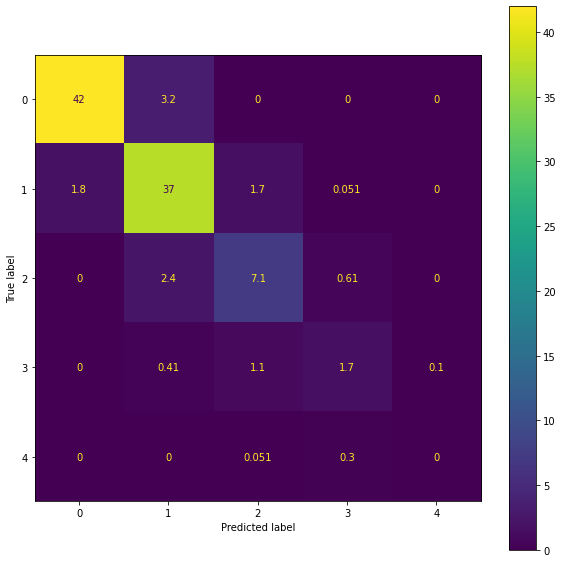

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#The normalize="all" displays ratios instead of just frequencies
#Multiplied by 100 for percentages
#If you want to see the frequencies just remove normalize='all' and the * 100
cm = confusion_matrix(y_test, preds, normalize="all") * 100
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

Now that you've used K-Fold Cross validation to choose a model, train the model you chose on all of the available data.

<b>Remember that we only use K-Fold to get an estimate of each model's performance to be able to select a model, but when we've selected a model we want to train it on all available data, not just 4/5 on it in case of 5-Fold cross validation</b>

<h1><b>Q8: For the final piece of the puzzle, fill in the next cell with the best model and hyperparameters you found using cross validation and train it on all the labeled data to be able to get predictions on the test set</b></h1>

In [ ]:
#TODO: Use the model and hyperparameters you found in Q7
clf = RandomForestClassifier(random_state=0)
#TODO: Fit it using X and y (All of the training data)
clf.fit(X_train,y_train)

#Turn test_df into a numpy array and get the predictions
test_df = test_df.to_numpy()
preds = clf.predict(test_df)
preds

array([1, 0, 1, ..., 0, 1, 1])

<h2><b>Don't forget to submit the form and upload your submission to Kaggle:</h2></b>

Form link:

https://forms.gle/8YYY5WAFhMQfrBJM9

Kaggle link:

https://www.kaggle.com/t/f21a20616b5f4e14b1dd03880225e9c7

In [ ]:
submission = pd.read_csv("sample_submission.csv")

submission.price_category = preds

submission.to_csv("cars_submission.csv", index=False)

<h1><b>Aaaand we're done! Congratulations on making it this far! 🎉🎉🎉</b></h1>